In [1]:
import pandas as pd
project_path="E:\\NeuralNetworkConsoleData\\Bridgestone\\02_projects\\01_valiational_AE2.files\\20191025_180827\\"
datacsv=project_path+"output_result.csv"
df = pd.read_csv(datacsv)
df.head()

x:image  y:label              x'  \
0  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1  .\0_0000\0.png   
1  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1  .\0_0000\1.png   
2  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0  .\0_0000\2.png   
3  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0  .\0_0000\3.png   
4  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0  .\0_0000\4.png   

   Identity__0  Identity__1  
0     1.073892    -1.354071  
1     1.141927     0.429618  
2    -0.172344    -0.734269  
3    -0.216694    -0.830279  
4    -0.731572     0.477930

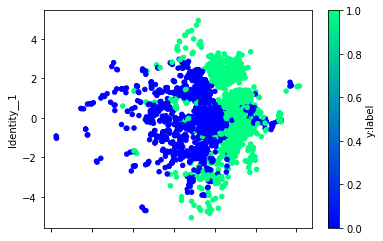

In [3]:
import matplotlib.pyplot as plt
#latent-variable散布図
df.plot.scatter(x="Identity__0",y="Identity__1",c=df.index[1],cmap="winter")

x:image  y:label  \
3230  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
1048  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
3101  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
1477  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
4170  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
1616  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
782   E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
2235  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
2119  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
855   E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        0   
934   E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
3281  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
1564  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
907   E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
4814  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
3087  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
4802  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
1527  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
345   E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
385   E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
3456  E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   
898   E:\NeuralNetworkConsoleData\Bridgestone\01_dat...        1   

                     x'  Identity__0  Identity__1  
3230  .\0_0003\3230.png    -1.938026     0.012447  
1048  .\0_0001\1048.png    -0.790049     0.013398  
3101  .\0_0003\3101.png    -0.723092     0.011988  
1477  .\0_0001\1477.png    -0.510198     0.011249  
4170  .\0_0004\4170.png    -0.242591     0.011988  
1616  .\0_0001\1616.png    -0.135146     0.012569  
782    .\0_0000\782.png    -0.124505     0.011682  
2235  .\0_0002\2235.png    -0.077812     0.011237  
2119  .\0_0002\2119.png    -0.008682     0.012822  
855    .\0_0000\855.png     0.042396     0.011213  
934    .\0_0000\934.png     0.692764     0.011511  
3281  .\0_0003\3281.png     1.139445     0.014434  
1564  .\0_0001\1564.png     1.141216     0.011415  
907    .\0_0000\907.png     1.153900     0.010442  
4814  .\0_0004\4814.png     1.160387     0.014144  
3087  .\0_0003\3087.png     1.175272     0.014706  
4802  .\0_0004\4802.png     1.176545     0.013375  
1527  .\0_0001\1527.png     1.279950     0.010186  
345    .\0_0000\345.png     1.642047     0.013713  
385    .\0_0000\385.png     1.847057     0.012340  
3456  .\0_0003\3456.png     1.894440     0.014930  
898    .\0_0000\898.png     2.398720     0.012195

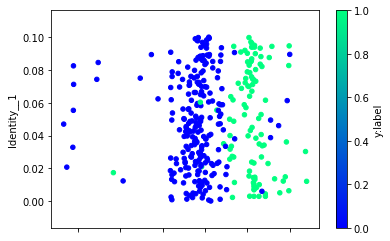

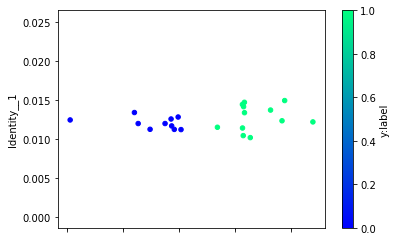

In [27]:
alpha=0
df_alp = df[(df["Identity__1"]>alpha)&(df["Identity__1"]<alpha+0.1)]
df_alp.plot.scatter(x="Identity__0",y="Identity__1",c=df.index[1],cmap="winter")
df_alp_tight = df[(df["Identity__1"]>alpha+0.01)&(df["Identity__1"]<alpha+0.015)]
df_alp_tight.plot.scatter(x="Identity__0",y="Identity__1",c=df.index[1],cmap="winter")
df_at_sort = df_alp_tight.sort_values('Identity__0')
df_at_sort

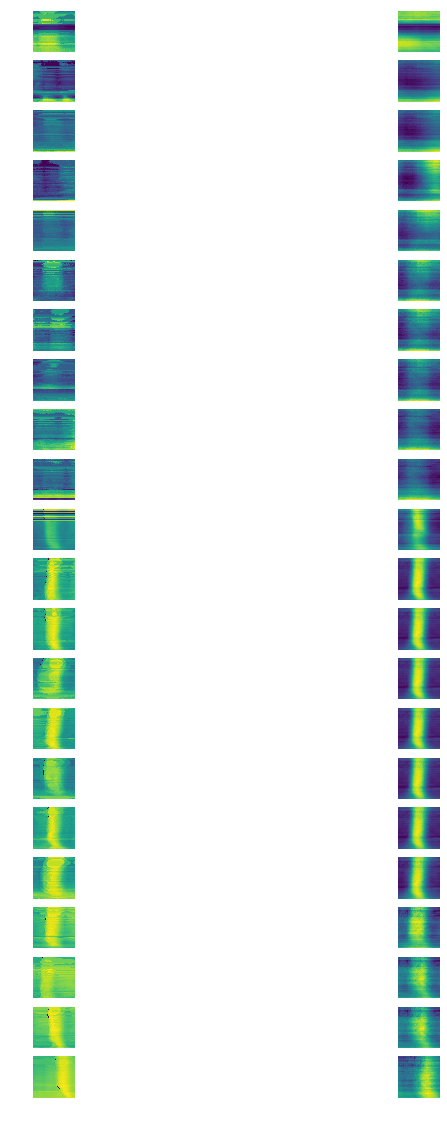

In [28]:
import numpy as np
import cv2

def get_img(i):
    imagefile = df_at_sort.iat[i,0]
    outfile = project_path+df_at_sort.iat[i,2].lstrip(".\\")
    imgin = cv2.imread(imagefile,cv2.IMREAD_GRAYSCALE)
    imgout = cv2.imread(outfile,cv2.IMREAD_GRAYSCALE)
    return imgin,imgout
columns=df_at_sort.shape[0]
fig=plt.figure(figsize=(12,20))
piclist=[]
for i in range(columns):
    imgin,imgout=get_img(i)
    piclist.append(imgin)
    piclist.append(imgout)
    #desctibe_inputimage
    c_in=2*(i+1)-1
    ax=fig.add_subplot(columns,2,c_in)
    ax.imshow(imgin)
    ax.set_axis_off()
    #describe_outputimage
    c_out=c_in+1
    ax=fig.add_subplot(columns,2,c_out)
    ax.imshow(imgout)
    ax.set_axis_off()

In [29]:
import shutil
import os
path2="C:\\Users\\isc\\pythonscript\\20191025BSSubmit4\\outpics"
x=0
for filepath in piclist:
    image=filepath
    name=path2+"\\"+str(x)+".bmp"
    cv2.imwrite(name,image)
    x+=1